## Importazione librerie e caricamento dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [4]:
df_cyclists = pd.read_csv('dataset/df_cyclists_no_missing.csv')
df_races = pd.read_csv('dataset/df_races_no_missing.csv')

## Cyclists

In [ ]:
df_cyclists.head()

In [ ]:
df_cyclists.info()

### Informazioni statistiche di base

In [ ]:
df_cyclists.describe()

### Checking for duplicates

In [ ]:
num_duplicates = df_cyclists.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

## Data Distribution - Cylists

### Birth Year

In [ ]:

df_cyclists['birth_year'].value_counts()

In [ ]:
df_cyclists['birth_year'].describe()

In [ ]:
def sturges_bin_count(df):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df)) + 1))

In [ ]:
bins = sturges_bin_count(df_cyclists["birth_year"])
print(f"Recommended number of bins: {bins}")

In [ ]:
sns.displot(df_cyclists, x="birth_year", kind="hist", row_order="desc", bins=bins)

In [ ]:
sns.boxplot(x='birth_year', data=df_cyclists)

### Weight

In [ ]:
df_cyclists['weight'].value_counts()

In [ ]:
df_cyclists['weight'].describe()

In [ ]:
bins = sturges_bin_count(df_cyclists["weight"])
print(f"Recommended number of bins: {bins}")

In [ ]:
sns.displot(df_cyclists, x="weight", kind="hist", row_order="desc", bins=bins)

In [ ]:
sns.boxplot(x='weight', data=df_cyclists)

### Height

In [ ]:
df_cyclists['height'].value_counts()

In [ ]:
df_cyclists['height'].describe()

In [ ]:
bins = sturges_bin_count(df_cyclists["height"])
print(f"Recommended number of bins: {bins}")

In [ ]:
sns.displot(df_cyclists, x="height", kind="hist", row_order="desc", bins=bins)

In [ ]:
sns.boxplot(x='height', data=df_cyclists)

### Nationality

In [ ]:
df_cyclists['nationality'].value_counts()

In [ ]:
sns.displot(df_cyclists, x="nationality", kind="hist", row_order="desc", bins=len(df_cyclists['nationality'].unique()), aspect=2)
plt.xticks(rotation=90);

### Height distribution by nationality

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cyclists, x='height', y='nationality')
plt.title('Height Distribution by Nationality')
plt.xlabel('Height (cm)')
plt.ylabel('Nationality')
plt.show()

### Height Vs. Weight (By Nationality)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cyclists, x='weight', y='height', hue='nationality', alpha=0.6, legend=False)
plt.title('Height vs. Weight (by Nationality)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

### Height trends by decade

In [ ]:
df_cyclists['decade'] = (df_cyclists['birth_year'] // 10) * 10

height_trends = df_cyclists.groupby('decade')['height'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=height_trends, x='decade', y='height', marker='o')
plt.title('Average Height Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

height_trends

### Weight trends by decade

In [ ]:
weight_trends = df_cyclists.groupby('decade')['weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=weight_trends, x='decade', y='weight', marker='o')
plt.title('Average Weight Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

weight_trends

## Races

In [ ]:
df_races.head()

In [ ]:
df_races.info()

### Informazioni statistiche di base

In [ ]:
df_races.describe()

### Checking for duplicates

In [ ]:
num_duplicates = df_races.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

## Data Distribution - Races

In [ ]:
numeric_columns = df_races.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_races.select_dtypes(include=['object', 'category', 'bool']).columns


### Numerical columns

In [ ]:
for col in numeric_columns:
    bins = sturges_bin_count(df_races[col])
    sns.displot(df_races, x=col, kind="hist", row_order="desc", bins=bins)

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_races, x=col)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
df_races.head()

### Non numerical columns (only the most important ones)

In [ ]:
frequences = df_races['name'].value_counts()

plt.figure(figsize=(8, 5))
frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Race name')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
frequences = df_races['cyclist_team'].value_counts()

plt.figure(figsize=(15, 12))
frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Cyclist Team')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
frequences = df_races['cyclist'].value_counts()
filtered_frequences = frequences[frequences > 500]

plt.figure(figsize=(15, 12))
filtered_frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Cyclist')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### Lenght vs climb_total (by profile)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_races, x='length', y='climb_total', hue='profile')
plt.title('Lunghezza della corsa vs Metri totali di salita')
plt.xlabel('Lunghezza della corsa')
plt.ylabel('Metri totali di salita')
plt.show()

### Profile vs Position/Delta

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_races, x='profile', y='delta')
plt.title('Profilo della corsa vs Delta')
plt.xlabel('Profilo della corsa')
plt.ylabel('Delta (s)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_races, x='profile', y='position')
plt.title('Profilo della corsa vs Posizione')
plt.xlabel('Profilo della corsa')
plt.ylabel('Posizione finale')
plt.show()

### Surfaces analysis

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_tarmac', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_cobbled', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_gravel', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

### Startlist_quality vs delta

In [ ]:
df_races['startlist_quality'].value_counts()

## Combination of the two - Data Distribution

In [5]:
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='weight', alpha=0.6)
plt.title('Age vs. Weight')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='height', alpha=0.6)
plt.title('Age vs. Height')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

In [ ]:
df_merged['age_group'] = pd.cut(df_merged['cyclist_age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_merged, x='weight', y='height', hue='age_group', alpha=0.7)
plt.title('Height vs. Weight Distribution by Age Group')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(title='Age Group')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='nationality', y='position')
plt.title('Distribuzione della Posizione Finale per Nazionalità')
plt.xlabel('Nazionalità')
plt.ylabel('Posizione Finale')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='position')
plt.title('Posizione Finale in funzione dell\'Età del Ciclista')
plt.xlabel('Età del Ciclista')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='weight', y='delta', hue='position', palette='viridis')
plt.title('Peso del Ciclista vs Delta')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='height', y='delta', hue='position', palette='viridis')
plt.title('Altezza del Ciclista vs Delta')
plt.xlabel('Altezza del Ciclista (cm)')
plt.ylabel('Delta (s)')
plt.show()

In [ ]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='height_category')
plt.title('Profilo della Corsa vs Posizione per Categorie di Altezza')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Posizione Finale')
plt.legend(title='Categoria di Altezza')
plt.show()

In [ ]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='weight_category')
plt.title('Profilo della Corsa vs Posizione per Categorie di Peso')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Posizione Finale')
plt.legend(title='Categoria di Altezza')
plt.show()

In [ ]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='weight_category', y='position')
plt.title('Distribuzione della Posizione Finale per Categorie di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='height_category', y='position')
plt.title('Distribuzione del Delta per Altezza del Ciclista')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='weight_category')
plt.title('Profilo della Corsa vs Delta per Categorie di Peso')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Delta (s)')
plt.legend(title='Categoria di Peso')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='height_category')
plt.title('Profilo della Corsa vs Delta per Categorie di Altezza')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Delta (s)')
plt.legend(title='Categoria di Altezza')
plt.show()

In [ ]:
stratified_sample = df_merged.groupby('nationality', group_keys=False).apply(lambda x: x.sample(min(len(x), 50))) 
plt.figure(figsize=(12, 9))
sns.boxplot(data=stratified_sample, x='nationality', y='position')
plt.title('Distribuzione della Posizione per Nazionalità')
plt.xlabel('Nazionalità')
plt.ylabel('Posizione Finale')
plt.xticks(rotation=90)
plt.show()

In [ ]:
stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stratified_sample, x='weight', y='delta', hue='profile')
plt.title('Peso vs Delta per Profili di Corsa (Campionamento Stratificato)')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.legend(title='Profilo della Corsa')
plt.show()

In [ ]:
stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stratified_sample, x='height', y='delta', hue='profile')
plt.title('Altezza vs Delta(s) per Profilo di Corsa (Campionamento Stratificato)')
plt.xlabel('Altezza del Ciclista (cm)')
plt.ylabel('Delta(s)')
plt.legend(title='Profilo della Corsa')
plt.show()

In [ ]:
stratified_sample_age = df_merged.groupby('cyclist_age', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.boxplot(data=stratified_sample_age, x='profile', y='position', hue='cyclist_age')
plt.title('Profilo della Corsa vs Position per Età del Ciclista alla Gara (Campionamento Stratificato)')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Position')
plt.legend(title='Età del Ciclista alla Gara')
plt.show()


In [ ]:
mountain_races = df_merged[df_merged['profile'] == 4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='weight_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare di Montagna per Categoria di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:

mountain_races = df_merged[df_merged['profile'] == 4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='height_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare di Montagna per Categoria di Altezza')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:
flat_races = df_merged[df_merged['profile'] == 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='height_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare Pianeggianti per Categoria di Altezza')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:
flat_races = df_merged[df_merged['profile'] == 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='weight_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare Pianeggianti per Categoria di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta')
plt.title('Distribuzione del Delta per Differenti Profili di Gara')
plt.xlabel('Profilo della Gara')
plt.ylabel('Delta (s)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='weight', y='delta', hue='profile', palette='viridis')
plt.title('Peso vs Delta con Differenti Profili di Gara')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.legend(title='Profilo della Gara')
plt.show()

In [ ]:
# Identificazione dei leader basata su posizioni medie e delta
df_merged['leader_candidate'] = (df_merged['position'] <= 5) & (df_merged['delta'] < df_merged['delta'].quantile(0.25))

# Visualizza il conteggio dei leader identificati
plt.figure(figsize=(6, 6))
sns.countplot(data=df_merged, x='leader_candidate')
plt.title('Distribuzione dei Ciclisti Leader Identificati')
plt.xlabel('Leader Identificato')
plt.ylabel('Conteggio')
plt.show()

In [ ]:
puncheur_races = df_merged[df_merged['profile'] == 3 | 2]
plt.figure(figsize=(12, 6))
sns.boxplot(data=puncheur_races, x='weight_category', y='position')
plt.title('Prestazioni dei Puncheur in Gare Collinari')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

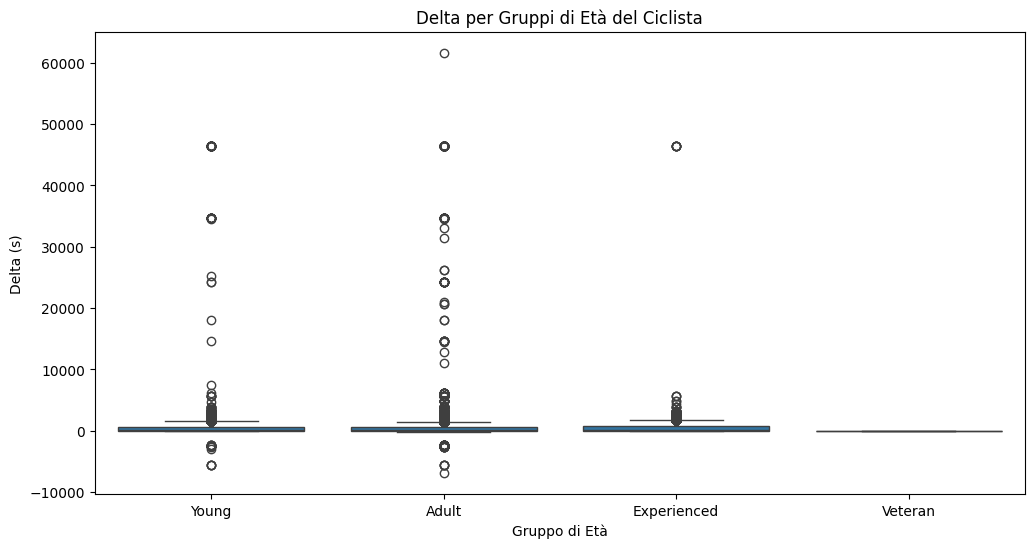

In [7]:
df_merged['age_group'] = pd.cut(df_merged['cyclist_age'], bins=[15, 25, 35, 45, 60], labels=['Young', 'Adult', 'Experienced', 'Veteran'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='age_group', y='delta')
plt.title('Delta per Gruppi di Età del Ciclista')
plt.xlabel('Gruppo di Età')
plt.ylabel('Delta (s)')
plt.show()


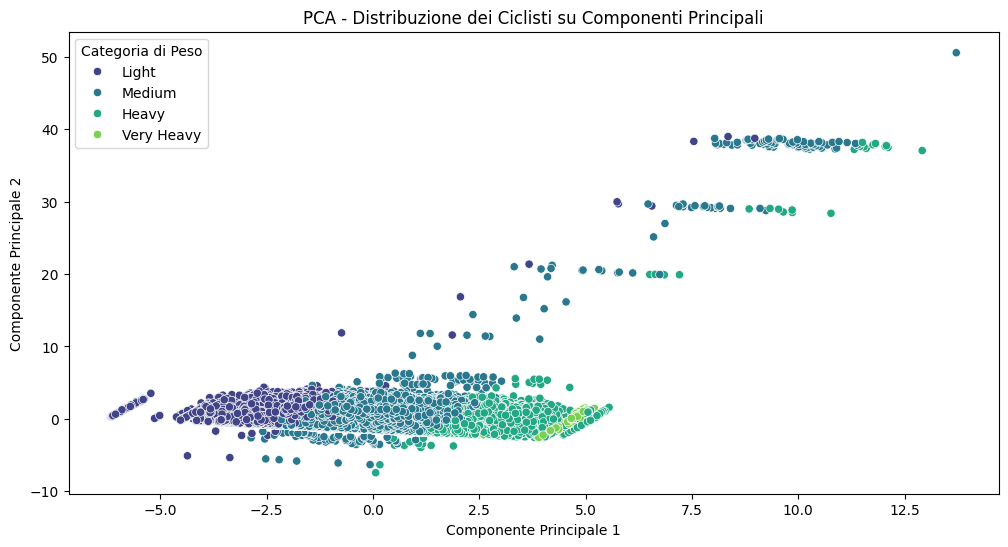

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleziona le caratteristiche rilevanti (esempio: peso, altezza, delta, posizione)
features = df_merged[['weight', 'height', 'delta', 'position']]
scaled_features = StandardScaler().fit_transform(features)
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])

# Applica PCA
pca = PCA(n_components=2)  # Riduci a 2 componenti principali
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='weight_category', palette='viridis')
plt.title('PCA - Distribuzione dei Ciclisti su Componenti Principali')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Peso')
plt.show()



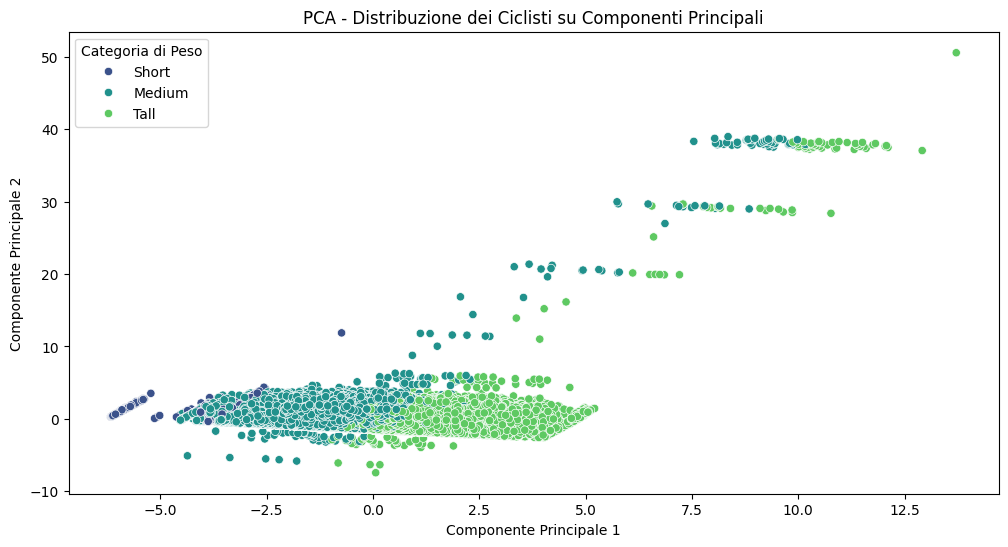

In [11]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])

# Applica PCA
pca = PCA(n_components=2)  # Riduci a 2 componenti principali
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='height_category', palette='viridis')
plt.title('PCA - Distribuzione dei Ciclisti su Componenti Principali')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Peso')
plt.show()

## Correlation Analysis - Cyclists

In [ ]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [ ]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists)
correlations = correlations(normalized_dataset)
correlations

In [ ]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

In [ ]:
numerical_features = df_cyclists.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_cyclists[numerical_features])
plt.show()

## Correlation analysis - Races

In [ ]:
df_races = pd.read_csv('../dataset/df_races_no_missing.csv')
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_races)
correlation_results = correlations(normalized_dataset) 
correlation_results


In [ ]:
g = sns.FacetGrid(correlation_results, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

In [ ]:
numerical_features = df_races.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_races[numerical_features])
plt.show()

## Combination of the two - Correlation Analysis

In [ ]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_merged)
correlations = correlations(normalized_dataset)
correlations

In [ ]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

In [ ]:
df_cyclists = pd.read_csv('../dataset/df_cyclists_no_missing.csv')
df_races = pd.read_csv('../dataset/df_races_no_missing.csv')
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')

numerical_features = df_merged.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_merged[numerical_features])
plt.show()